In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [2]:
!cp -RT '/content/gdrive/My Drive/Space/msl-images' /

In [3]:
import os
os.getcwd()


'/content'

In [4]:
os.chdir("../")

In [5]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tqdm import tqdm

In [6]:
os.getcwd()

'/'

In [7]:
os.chdir('../')

In [8]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocess.
from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical

# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
 
import tensorflow as tf
import random as rn

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

In [9]:
import pandas as pd 
train = pd.read_csv("train-calibrated-shuffled.txt", sep=" ", header=None)

In [10]:
train.head()

,0,1
0,calibrated/0077ML0005780000102730I01_DRCL.JPG,15
1,calibrated/0072MR0005610170103642E01_DRCL.JPG,8
2,calibrated/0069MR0004130000103477I01_DRCL.JPG,21
3,calibrated/0154ML0008510010104492E01_DRCL.JPG,8
4,calibrated/0019MR0000530000100138C00_DRCL.JPG,8


In [11]:
len(train)

3746

In [12]:
train.columns=['id','label']
train.head()

,id,label
0,calibrated/0077ML0005780000102730I01_DRCL.JPG,15
1,calibrated/0072MR0005610170103642E01_DRCL.JPG,8
2,calibrated/0069MR0004130000103477I01_DRCL.JPG,21
3,calibrated/0154ML0008510010104492E01_DRCL.JPG,8
4,calibrated/0019MR0000530000100138C00_DRCL.JPG,8


In [13]:
test = pd.read_csv("test-calibrated-shuffled.txt", sep=" ")
test.columns=['id','label']

len(test)



1304

In [14]:
test.head()

,id,label
0,calibrated/0640MH0002640000203781I01_DRCL.JPG,24
1,calibrated/0647MH0003250050203806E01_DRCL.JPG,9
2,calibrated/0844MR0037590000501001I01_DRCL.JPG,7
3,calibrated/0618MR0026460020401253I01_DRCL.JPG,11
4,calibrated/0605MH0003060010203269I01_DRCL.JPG,8


In [15]:
val = pd.read_csv("val-calibrated-shuffled.txt", sep=" ")
val.columns=['id','label']


In [16]:
val.head()

,id,label
0,calibrated/0270MH0002530050102760I01_DRCL.JPG,5
1,calibrated/0549MH0002620000201566E01_DRCL.JPG,24
2,calibrated/0229MR0009720000202913E01_DRCL.JPG,0
3,calibrated/0292MH0002810020103613C00_DRCL.JPG,5
4,calibrated/0552MH0002620000201620I01_DRCL.JPG,24


In [17]:
len(val)

1639

In [18]:
import os

In [19]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import torch
import torchvision
import tarfile
import torchvision
from torch.utils.data import random_split
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torchvision.transforms import ToTensor
from torch.utils.data.dataloader import DataLoader
import torch.nn as nn
from torchvision.utils import make_grid
import torchvision.models as models
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
os.getcwd()

'/'

In [21]:
!rm -rf /aboli

In [22]:
!mkdir /aboli

In [23]:
!mkdir /aboli/class_0
!mkdir /aboli/class_1
!mkdir /aboli/class_2
!mkdir /aboli/class_3
!mkdir /aboli/class_4
!mkdir /aboli/class_5
!mkdir /aboli/class_6
!mkdir /aboli/class_7
!mkdir /aboli/class_8
!mkdir /aboli/class_9
!mkdir /aboli/class_10
!mkdir /aboli/class_11
!mkdir /aboli/class_12
!mkdir /aboli/class_13
!mkdir /aboli/class_14
!mkdir /aboli/class_15
!mkdir /aboli/class_16
!mkdir /aboli/class_17
!mkdir /aboli/class_18
!mkdir /aboli/class_19
!mkdir /aboli/class_20
!mkdir /aboli/class_21
!mkdir /aboli/class_23
!mkdir /aboli/class_24

In [24]:
val.head()

,id,label
0,calibrated/0270MH0002530050102760I01_DRCL.JPG,5
1,calibrated/0549MH0002620000201566E01_DRCL.JPG,24
2,calibrated/0229MR0009720000202913E01_DRCL.JPG,0
3,calibrated/0292MH0002810020103613C00_DRCL.JPG,5
4,calibrated/0552MH0002620000201620I01_DRCL.JPG,24


In [25]:
train.head()

,id,label
0,calibrated/0077ML0005780000102730I01_DRCL.JPG,15
1,calibrated/0072MR0005610170103642E01_DRCL.JPG,8
2,calibrated/0069MR0004130000103477I01_DRCL.JPG,21
3,calibrated/0154ML0008510010104492E01_DRCL.JPG,8
4,calibrated/0019MR0000530000100138C00_DRCL.JPG,8


In [26]:
import os,shutil

x = 0
for i in train.index:
  try:
    fileo = '/' + str(train.at[i,"id"])   
    shutil.copy2(fileo, "/aboli/class_" + str(train.at[i,"label"]) + "/")
  except:
    print( str(train.at[i,"id"]))
    
     

In [27]:
x = 0
for i in test.index:
  try:
    fileo = '/' + str(test.at[i,"id"])   
    shutil.copy2(fileo, "/aboli/class_" + str(test.at[i,"label"]) + "/")
  except:
    print( str(test.at[i,"id"]))
    

In [28]:
x = 0
for i in val.index:
  try:
    fileo = '/' + str(val.at[i,"id"])   
    shutil.copy2(fileo, "/aboli/class_" + str(val.at[i,"label"]) + "/")
  except:
    print( str(val.at[i,"id"]))

In [29]:
data_dir ="/aboli"


In [30]:
transformer = torchvision.transforms.Compose(
    [  # Applying Augmentation
        torchvision.transforms.Resize((224, 224)),
        torchvision.transforms.RandomHorizontalFlip(p=0.5),
        torchvision.transforms.RandomVerticalFlip(p=0.5),
        torchvision.transforms.RandomRotation(40),
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize(
            mean=[0.4914, 0.4822, 0.4465], std=[0.2023, 0.1994, 0.2010]
        ),
    ]
)
database = ImageFolder(data_dir, transform=transformer)

In [31]:
database.classes

['class_0',
 'class_1',
 'class_10',
 'class_11',
 'class_12',
 'class_13',
 'class_14',
 'class_15',
 'class_16',
 'class_17',
 'class_18',
 'class_19',
 'class_2',
 'class_20',
 'class_21',
 'class_23',
 'class_24',
 'class_3',
 'class_4',
 'class_5',
 'class_6',
 'class_7',
 'class_8',
 'class_9']

In [32]:
flower_name_dict={'class_0':0 ,
                  'class_1':1,
                  'class_2':2 ,
                  'class_3':3 ,
                  'class_4':4,
                  'class_5':5 ,
                  'class_6':6,
                  'class_7':7 ,
                  'class_8':8 ,
                  'class_9':9,
                  'class_10':10 ,
                  'class_11':11,
                  'class_12':12 ,
                  'class_13':13 ,
                  'class_14':14,
                  'class_15':15 ,
                  'class_16':16,
                  'class_17':17 ,
                  'class_18':18 ,
                  'class_19':19,
                  'class_20':20 ,
                  'class_21':21,
                  'class_23':22 ,
                  'class_24':23                  
                  
                  }

def encode_label(img_label):
    return flower_name_dict[img_label] 

In [33]:
flower_label = {
                  0: 'class_0',
                  1: 'class_1',
                  2: 'class_2' ,
                  3: 'class_3' ,
                  4: 'class_4',
                  5: 'class_5' ,
                  6: 'class_6',
                  7: 'class_7' ,
                  8: 'class_8' ,
                  9: 'class_9',
                  10: 'class_10',
                  11: 'class_11',
                  12: 'class_12' ,
                  13: 'class_13' ,
                  14: 'class_14',
                  15: 'class_15' ,
                  16: 'class_16',
                  17: 'class_17' ,
                  18: 'class_18' ,
                  19: 'class_19',
                  20: 'class_20' ,
                  21: 'class_21',
        
                  22: 'class_23' ,
                  23: 'class_24'   
}

In [34]:
def show_batch(dl,invert=True):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
        break

def show_sample(image, label,invert=True):
    print("Label :" +database.classes[label] + "(" + str(label) + ")")
    plt.imshow(image.permute(1, 2, 0))

In [35]:
ls /calibrated | wc -l

6737


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label :class_0(0)


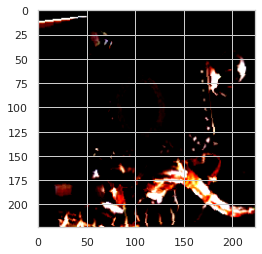

In [36]:
show_sample(*database[1])

In [37]:
validation_size = 2943
training_size = len(database) - validation_size

In [38]:
train_ds, val_ds_main = random_split(database,[training_size, validation_size])
val_ds, test_ds  = random_split(val_ds_main,[1639, 1304])
len(train_ds), len(val_ds)

(3746, 1639)

In [39]:
batch_size=32

In [40]:
train_dl = DataLoader(train_ds, batch_size , shuffle=True)
val_dl = DataLoader(val_ds,batch_size)
test_dl = DataLoader(test_ds, batch_size)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


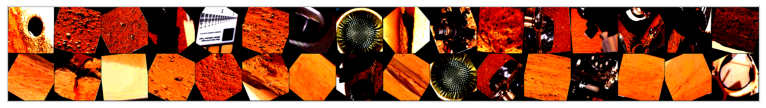

In [41]:
show_batch(train_dl,invert=True)

In [ ]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

class ImageClassification(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))

In [ ]:
class FlowerModel(ImageClassification):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), 

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), 

            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), 

            nn.Flatten(), 
            nn.Linear(256*28*28, 1024),
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512, 24))
        
    def forward(self, xb):
        return self.network(xb)

In [ ]:
model = FlowerModel()
model

FlowerModel(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Flatten(start_dim=1, end_dim=-1)
    (16): Linear(in_features=200704, out_features=1024, bias=True)
    (17): ReLU()
    (18): Linear(in_featur

In [ ]:
 for images, labels in train_dl:
    print('images.shape:', images.shape)
    out = model(images)
    print('out.shape:', out.shape)
    print('out[0]:', out[0])
    break

images.shape: torch.Size([32, 3, 224, 224])
out.shape: torch.Size([32, 24])
out[0]: tensor([ 0.0214, -0.0342, -0.0378, -0.0028, -0.0452,  0.0354, -0.0201,  0.0484,
        -0.0025, -0.0093, -0.0173, -0.0474,  0.0165,  0.0122,  0.0372,  0.0147,
         0.0236, -0.0068,  0.0011,  0.0044, -0.0084,  0.0242, -0.0359,  0.0122],
       grad_fn=<SelectBackward>)


In [51]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history


In [45]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)
device = get_default_device()

In [46]:
device = get_default_device()
device

device(type='cpu')

In [47]:
train_dl = DeviceDataLoader(train_dl, device)
val_dl = DeviceDataLoader(val_dl, device)
to_device(model, device);


NameError: ignored

In [48]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

class FlowerClassification(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))

In [53]:
class FlowerModel18(FlowerClassification):
    def __init__(self):
        super().__init__()
        # Use a pretrained model
        self.network = models.resnet18(pretrained=True)
        # Replace last layer
        num_ftrs = self.network.fc.in_features
        self.network.fc = nn.Linear(num_ftrs, 24)
        
    def forward(self, xb):
        return torch.sigmoid(self.network(xb))

In [54]:
model = to_device(FlowerModel18(), device)
evaluate(model, val_dl)

{'val_acc': 0.012362637557089329, 'val_loss': 3.1673290729522705}

In [55]:
num_epochs = 10
opt_func = torch.optim.Adam
lr = 0.001

In [56]:
%%time
try3 = fit(num_epochs, lr, model, train_dl, val_dl, opt_func)

Epoch [0], train_loss: 2.4626, val_loss: 2.4262, val_acc: 0.7460
Epoch [1], train_loss: 2.4018, val_loss: 2.3970, val_acc: 0.7940
Epoch [2], train_loss: 2.3686, val_loss: 2.4180, val_acc: 0.7187
Epoch [3], train_loss: 2.3719, val_loss: 2.3654, val_acc: 0.8332
Epoch [4], train_loss: 2.3675, val_loss: 2.3898, val_acc: 0.7764
Epoch [5], train_loss: 2.3436, val_loss: 2.3414, val_acc: 0.8843
Epoch [6], train_loss: 2.3328, val_loss: 2.3349, val_acc: 0.8704
Epoch [7], train_loss: 2.3299, val_loss: 2.3811, val_acc: 0.8254
Epoch [8], train_loss: 2.3325, val_loss: 2.3499, val_acc: 0.8539
Epoch [9], train_loss: 2.3354, val_loss: 2.3273, val_acc: 0.8881
CPU times: user 3h 7min 49s, sys: 2min 26s, total: 3h 10min 16s
Wall time: 3h 10min 56s


In [57]:
evaluate(model, train_dl)

{'val_acc': 0.8795021176338196, 'val_loss': 2.3168556690216064}

In [58]:
evaluate(model, val_dl)

{'val_acc': 0.8758585453033447, 'val_loss': 2.3265624046325684}

In [59]:
evaluate(model, test_dl)

{'val_acc': 0.8689024448394775, 'val_loss': 2.3330068588256836}

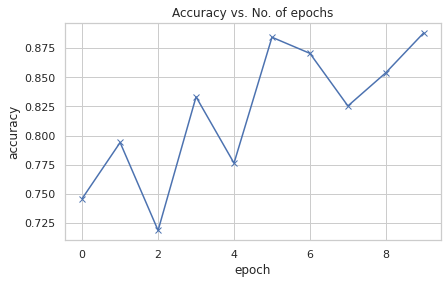

In [60]:
def plot_accuracies(try3):
    accuracies = [x['val_acc'] for x in try3]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

plot_accuracies(try3)

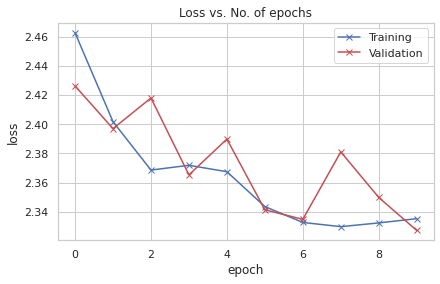

In [61]:
def plot_losses(try3):
    train_losses = [x.get('train_loss') for x in try3]
    val_losses = [x['val_loss'] for x in try3]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');
plot_losses(try3)

In [62]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds  = torch.max(yb, dim=1)
    return flower_label[preds[0].item()]

Label: class_5 , Predicted: class_19


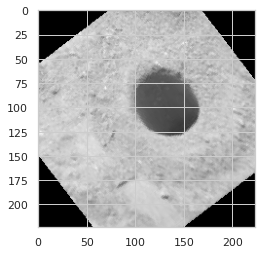

In [63]:
img, label = test_ds[17]
plt.imshow(img[0], cmap='gray')
print('Label:', database.classes[label], ', Predicted:', predict_image(img, FlowerModel18()))


Label: class_5 , Predicted: class_18


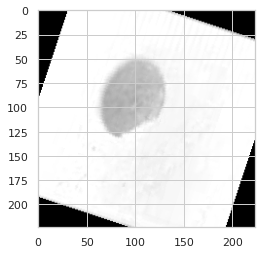

In [64]:
img, label = test_ds[10]
plt.imshow(img[0], cmap='gray')
print('Label:', database.classes[label], ', Predicted:', predict_image(img, FlowerModel18()))



In [65]:
torch.save(model.state_dict(), '/content/gdrive/My Drive/Space/Flower-classification3.pth')